# Finance Datareader 사용 

다행히 국내 주식 데이터와 해외 여러 지표들을 Finance Datareader를 이용해서 편하게 가져올 수 있다.


[github](https://github.com/FinanceData/FinanceDataReader)를 참조해서 사용 레퍼런스 등이 잘 정리되어 있다.

밑에 코드는 깃허브를 참조하여 작성하였습니다.

## Imports & Settings

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [14]:
import FinanceDataReader as fdr
import pandas as pd 

## 상장 회사 데이터 가져오기

In [8]:
krx = fdr.StockListing('KRX') # 코스피, 코스닥, 코넥스 전체
kopsi = fdr.StockListing('KOSPI') # 코스피
kosdaq = fdr.StockListing('KOSDAQ') # 코스닥
konex = fdr.StockListing('KONEX') # 코넥스

In [9]:
krx.head(10)

,Symbol,Market,Name,Sector,Industry,ListingDate,SettleMonth,Representative,HomePage,Region
0,060310,KOSDAQ,3S,특수 목적용 기계 제조업,반도체 웨이퍼 캐리어,2002-04-23,03월,"박종익, 김세완 (각자 대표이사)",http://www.3sref.com,서울특별시
1,095570,KOSPI,AJ네트웍스,산업용 기계 및 장비 임대업,"렌탈(파렛트, OA장비, 건설장비)",2015-08-21,12월,박대현,http://www.ajnet.co.kr,서울특별시
2,006840,KOSPI,AK홀딩스,기타 금융업,지주사업,1999-08-11,12월,"채형석, 이석주(각자 대표이사)",http://www.aekyunggroup.co.kr,서울특별시
3,054620,KOSDAQ,APS홀딩스,기타 금융업,인터넷 트래픽 솔루션,2001-12-04,12월,정기로,http://www.apsholdings.co.kr,경기도
4,265520,KOSDAQ,AP시스템,특수 목적용 기계 제조업,디스플레이 제조 장비,2017-04-07,12월,김영주,http://www.apsystems.co.kr,경기도
5,211270,KOSDAQ,AP위성,통신 및 방송 장비 제조업,위성통신 단말기,2016-03-04,12월,류장수,http://www.apsi.co.kr,서울특별시
6,152100,KOSPI,ARIRANG 200,NaN,NaN,NaT,NaN,NaN,NaN,NaN
7,295820,KOSPI,ARIRANG 200동일가중,NaN,NaN,NaT,NaN,NaN,NaN,NaN
8,253150,KOSPI,ARIRANG 200선물레버리지,NaN,NaN,NaT,NaN,NaN,NaN,NaN
9,253160,KOSPI,ARIRANG 200선물인버스2X,NaN,NaN,NaT,NaN,NaN,NaN,NaN


## 주식 데이터 가져오기

In [6]:
# 삼성전자(005930)
df = fdr.DataReader('005930')
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6000 entries, 1997-05-31 to 2021-06-02
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    6000 non-null   int64  
 1   High    6000 non-null   int64  
 2   Low     6000 non-null   int64  
 3   Close   6000 non-null   int64  
 4   Volume  6000 non-null   int64  
 5   Change  5999 non-null   float64
dtypes: float64(1), int64(5)
memory usage: 328.1 KB


In [7]:
# 기간 설정
df = fdr.DataReader('005930', start='2010-01-01', end='2020-01-01')
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2466 entries, 2010-01-04 to 2019-12-30
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    2466 non-null   int64  
 1   High    2466 non-null   int64  
 2   Low     2466 non-null   int64  
 3   Close   2466 non-null   int64  
 4   Volume  2466 non-null   int64  
 5   Change  2466 non-null   float64
dtypes: float64(1), int64(5)
memory usage: 134.9 KB


## 수정주가 요약
1. 수정주가(Adjusted Price)란 총 발행 주식수의 변화를 반영한 가격입니다
2. 백테스트나 수익률 분석을 위해서는 수정주가를 사용합니다
3. FinanceDataReader 모든 가격을 수정가격(Adjusted Price)로 제공합니다

## 수정주가(Adjusted Price) 개요

수정주가(Adjusted Price)란 총 발행 주식수의 변화를 반영한 가격을 말합니다. 액면분할, 액면병합, 유상증자, 무상증자와 같이 총 발행주식수의 변화가 발생하면 가격의 변화가 생깁니다. 예를 들어, 어떤 회사가 액면분할을 통해 1주를 2개로 쪼갠다고 하면, 주식수를 2배로 늘어나고 주식의 가격은 1/2로 낮아지며 시가총액은 동일하게 유지 됩니다.


또한 더욱 정확한 수정주가를 구하려면 회사 배당과 같은 세부적인 데이터들을 추가 시켜줘야 되는데 Finance Datareader는 상장주식수 변화를 기준으로한 수정주가만 계산되어 있습니다.


## 삼성전자 액면분할
실제 예를 들어보죠.

2018년 5월 4일, 삼성전자는 50:1로 액면분할을 합니다. 1주가 50주로 쪼개지는 것이죠. 

<img src="https://i.imgur.com/7ttN8B0.png" >

액면분할을 위해 2018-04-30 부터 2018-05-03 까지 3일간 거래정지되고 2018-05-04 부터 액면분할된 가격으로 거래가 시작된 것을 확인할 수 있습니다. 

이때 5000원인 삼성전자 주식 액면가는 액면분할 후 100원이 되었습니다. 액면분할 전에 주당 265만원(4월30일 기준)에서 5만3천원이 되었습니다.

위 표에는 표시되어 있지 않지만 2018-05-03일 총 주식수 128,386,494주에서 다음날 총 주식수는 6,419,324,700주 로 50배가 늘어났습니다. 즉 50:1로 액면분할을 한 것이죠.

만일 이 가격 데이터를 수정하지 않고 그대로 사용한다면 주가가 하루만에 1/50로 다시말해 -98% 하락한 것이 됩니다.

백테스트를 하기 위해서는 주식 가격 데이터의 연속성이 보장되어야 합니다. 가격의 연속성을 보장하기 위해서는 반드시 발행 주식수를 변화를 함께 고려해야 합니다. 발행주식수의 변화를 반영한 가격을 수정주가(Adjusted Price)라고 합니다. 

In [10]:
df = fdr.DataReader('005930', '2018-04-25', '2018-05-31')
df.head(10)

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2018-04-25,49220,50500,49220,50400,332292,-0.001189
2018-04-26,50420,52160,50400,52140,360931,0.034524
2018-04-27,53380,53639,52440,53000,606216,0.016494
2018-04-30,0,0,0,53000,0,0.000000
2018-05-02,0,0,0,53000,0,0.000000
2018-05-03,0,0,0,53000,0,0.000000
2018-05-04,53000,53900,51800,51900,39565391,-0.020755
2018-05-08,52600,53200,51900,52600,23104720,0.013487
2018-05-09,52600,52800,50900,50900,16128305,-0.032319


FinanceDataReader 에서 제공되는 데이터는 액면분할(2018-05-04) 이전의 가격 역시 5만원대 입니다.
다음 2018년 1년간 차트에서도 액면분할의 영향을 받지 않고, 현재 시점기준의 수정주가(Adjusted Price)임을 확인할 수 있습니다.

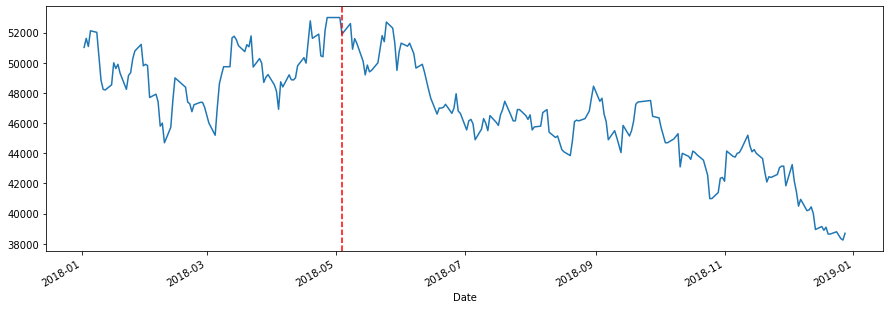

In [11]:
df = fdr.DataReader('005930', '2018-01-01', '2018-12-31')
ax = df['Close'].plot(figsize=(15,5))

ax.axvline('2018-05-04', ls='--', color='r')

## 여러 종목 데이터를 한번에 가져오기

In [12]:
# matplotlib rebuild
import matplotlib as mpl
mpl.font_manager._rebuild()

# matplotlib 환경 설정
import matplotlib.pyplot as plt
plt.rcParams["font.family"] = 'nanummyeongjo'
plt.rcParams["axes.grid"] = True
plt.rcParams["figure.figsize"] = (12,6)
plt.rcParams["axes.formatter.useoffset"] = False
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams["axes.formatter.limits"] = -10000, 10000

## 여러 종목의 종가(Close) 가져오기
다수 종목의 데이터를 가져와 개별 종목의 종가를 pd.concat()로 합칩니다

In [13]:
stock_list = [
  ["삼성전자", "005930"],
  ["SK하이닉스", "000660"],
  ["현대차", "005380"],
  ["셀트리온", "068270"],
  ["LG화학", "051910"],
  ["POSCO", "005490"],
  ["삼성물산", "028260"],
  ["NAVER", "035420"],
]

In [15]:
df_list = [fdr.DataReader(code, '2019-01-01', '2019-12-31')['Close'] for name, code in stock_list]
len(df_list)

8

In [16]:
df = pd.concat(df_list, axis=1)
df.columns = [name for name, code in stock_list] 
df.head(10)

,삼성전자,SK하이닉스,현대차,셀트리온,LG화학,POSCO,삼성물산,NAVER
Date,,,,,,,,
2019-01-02,38750,60600,114000,201192,337000,237000,104000,118000
2019-01-03,37600,57700,116500,197440,328000,237000,104500,122000
2019-01-04,37450,58300,119500,206350,330500,239000,107000,125500
2019-01-07,38750,58700,120500,202599,343000,246000,108000,131500
2019-01-08,38100,59200,119500,200254,349500,245500,107000,130000
2019-01-09,39600,63600,123000,200723,352000,255500,109000,133000
2019-01-10,39800,65300,123000,203067,347000,258500,108500,131000
2019-01-11,40500,65100,123000,203067,349000,255500,109000,131000
2019-01-14,40050,62100,121500,197909,350500,250000,109500,127000


<AxesSubplot:xlabel='Date'>

findfont: Font family ['nanummyeongjo'] not found. Falling back to DejaVu Sans.


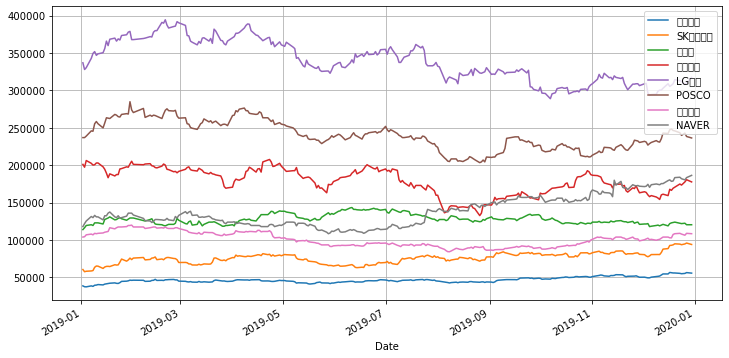

In [17]:
df.plot()

다수의 종목을 한번에 차트로 그려낼 수 있습니다. 

하지만 종목간의 비교를 하기 쉽지 않네요. 2개 종목만 그려봅니다.

<AxesSubplot:xlabel='Date'>

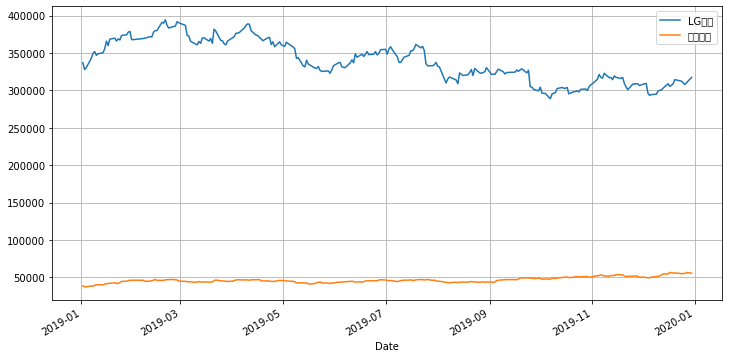

In [18]:
df[['LG화학', '삼성전자']].plot()

종목간의 가격차이가 커서 서로 비교하기가 어렵습니다. 

이때, secondary_y 옵션을 활용하면 서로 다른 영역을 비교하기 용이합니다.

<AxesSubplot:xlabel='Date'>

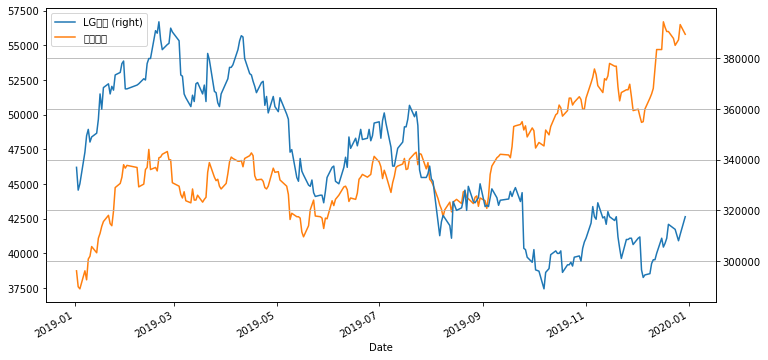

In [19]:
df[['LG화학', '삼성전자']].plot(secondary_y=['LG화학'])

두 개의 종목('LG화학', '삼성전자')이 서로 다른 행보를 가지는 것은 보이지만 시작점이 다르기 떄문에 시간에 따른 변화를 보기 쉽지 않습니다. 

시작점을 0으로 동일하게 맞추고 시간에 따른 수익률을 보기 위해 첫 번째 행(row)으로 모든 행(row)을 나누고 1.0을 빼줍니다.

<AxesSubplot:xlabel='Date'>

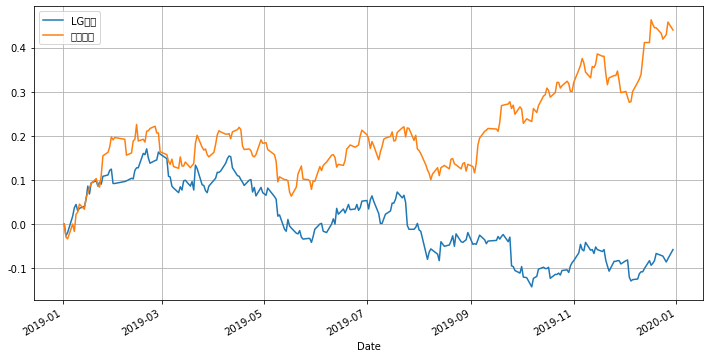

In [20]:
df2 = df[['LG화학', '삼성전자']]

df_plot = df2 / df2.iloc[0] - 1.0
df_plot.plot()

## 개별 종목의 2019년 수익률 비교

전체 종목의 성과(performance)를 시각화 해봅니다



<AxesSubplot:xlabel='Date'>

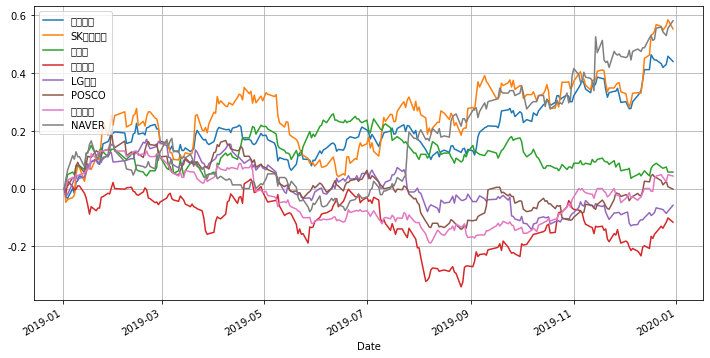

In [21]:
df_norm = df / df.iloc[0] - 1
df_norm.plot()

수익률이 큰 종목부터 순으로 나열해 봅니다. 가장 마지막날 (2019-12-30)의 수익률을 확인해 봅니다.

In [22]:
df_norm.iloc[-1].sort_values(ascending=False)

NAVER     0.580508
SK하이닉스    0.552805
삼성전자      0.440000
현대차       0.057018
삼성물산      0.043269
POSCO    -0.002110
LG화학     -0.057864
셀트리온     -0.116550
Name: 2019-12-30 00:00:00, dtype: float64